In [ ]:
#testing a meshgrid
import numpy as np
X = np.linspace(-1,1,3)
#print(X)
Y = np.linspace(5,7,3)
#print(Y)
Z = np.linspace(33,35,3)
#print(Z)

x,y,z = np.meshgrid(X,Y,Z,indexing = 'ij')

B = np.zeros((np.shape(x)+(3,)),dtype = np.float32)
eps = 1e-18
x0 = np.nanmean(X)+eps
y0 = np.nanmean(Y)+eps
z0 = np.nanmean(Z)+eps

B[:,:,:,2] = y#+y+z

from matplotlib import pyplot as plt
plt.figure()
plt.imshow(B[:,:,2,2])
plt.colorbar()

#print(z[:,:,2])
print(B[2,0,0,2])





In [ ]:
# test of ONE INSERT
# 1. import the b0 map without any shims. |before|
# import b0map as an object
import numpy as np  
import b0
b0map_before = b0.b0()
#filename_to_import_csv_data_from = r'./data/240619/Thursday_ball_R120_12pts_bvals_shifted.csv'
filename_to_import_csv_data_from = r'./data/240731/newinit_norings_240812_bvals_shifted.csv'
b0map_before.import_from_csv(filename_to_import_csv_data_from)
b0map_before.transfer_coordinates_of_the_path_from_cosi_to_magnet()


# change coordinates to magnet



In [23]:
# ONE MAGNET STRONG IN THE AIR
# 1. import the b0 map

import numpy as np  
import b0
b0map_onemagnet = b0.b0()
#filename_to_import_csv_data_from = r'./data/240619/Thursday_ball_R120_12pts_bvals_shifted.csv'
filename_to_import_csv_data_from = r'./data/240731/newinit_norings_240812_bvals_shifted.csv'
b0map_onemagnet.import_from_csv(filename_to_import_csv_data_from)
b0map_onemagnet.transfer_coordinates_of_the_path_from_cosi_to_magnet()


# change coordinates to magnet

No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240731/newinit_norings_240812_bvals_shifted.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240731/newinit_norings_240812,,,,,,
 not used. path data taken from csv!
OOPS
OOPS
importing path from a csv file
ROTATING THE PATH NOW!
path center set to:  [ 0.00280662 -0.01683974 -0.01543643]
ROTATING THE MAGNET NOW!
warning! euler angles of the magnet changed!
len(path.r)= 7126
len(b0Data)= 7126
-110.01403311815879  < x <  109.9859668818412
-110.0014033118159  < y <  109.99859668818416
-110.01262980634294  < z <  109.98737019365711
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step

c:\cosi-measure\Software\COSI2\b0.py:303: RuntimeWarning: divide by zero encountered in scalar divide
  if meanField_raw/abs(self.fieldDataAlongPath[idx,0])>1.25:


In [ ]:
# 2. import the b0 map without any shims. |after|
# import b0map as an object
b0map_after = b0.b0()
filename_to_import_csv_data_from = r'./data/240731/ball_R0I3_240813_R120_12pts_fixed_rotations_bvals_shifted.csv'
b0map_after.import_from_csv(filename_to_import_csv_data_from)
b0map_after.transfer_coordinates_of_the_path_from_cosi_to_magnet()


# change coordinates to magnet

In [24]:
print('before: ',np.nanmin(b0map_before.b0Data[:,:,:,0]),np.nanmax(b0map_before.b0Data[:,:,:,0]))
print('after: ',np.nanmin(b0map_after.b0Data[:,:,:,0]),np.nanmax(b0map_after.b0Data[:,:,:,0]))


# spherical decomposition
diameter_of_sphere = b0map_before.path.radius*2
order = 17
resolution_of_sph_decomp = 30
print(diameter_of_sphere)

#b0map_before.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
#b0map_after.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
b0map_onemagnet.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=8
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

#b0map_before.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
#b0map_after.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
b0map_onemagnet.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


before:  -47.74 -47.426
after:  -47.766 -47.388
240.0131016338168
(23, 23, 23)
Mean field strength in 24 cm sphere: -47.57 mT
Inhomogeneity in 24 cm sphere: -841 ppm
Inhomogeneity of fit: 852 ppm
Error: -69852 ppm
saved numpy array as ./data/tmp/SpHData.npy
interpolating field with sph order 17, resol 8 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 1910072 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


In [ ]:
# initial field (interpolated)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_before.xDim_SPH_fine
initialField = b0map_before.interpolatedField
print(np.nanmean(initialField))

print(np.nanmin(initialField),np.nanmax(initialField))

for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(initialField[i+j*5,:,:],clim=[-47.6,-47.55])#[np.nanmin(initialField),np.nanmax(initialField)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('INITIAL')

plt.savefig('./pics/init_field_iter2.png',format="png")
plt.savefig('./pics/init_field_iter2.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


-36.71475669982257
-64.45380131952739 5.6740194432286435


<Figure size 640x480 with 0 Axes>

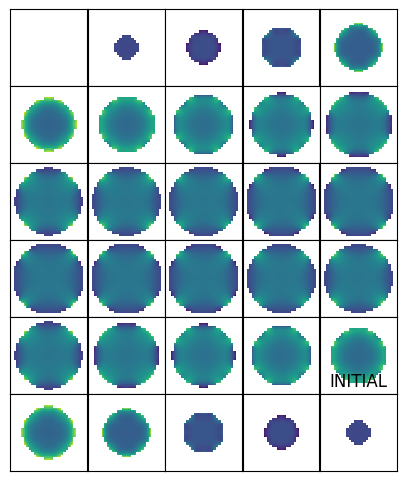

In [29]:
# ONE MAGNET field (interpolated)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_onemagnet.xDim_SPH_fine
oneMagnetField = b0map_onemagnet.interpolatedField
print(np.nanmean(oneMagnetField))

print(np.nanmin(oneMagnetField),np.nanmax(oneMagnetField))

for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(oneMagnetField[i+j*5,:,:],clim=[np.nanmin(oneMagnetField),np.nanmax(oneMagnetField)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('ONE MAGNET')

plt.savefig('./pics/ONEMAGNET_FIELD.png',format="png")
plt.savefig('./pics/ONEMAGNET_FIELD.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

In [ ]:
# R0I3 field (interpolated)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_after.xDim_SPH_fine
field1Insert = b0map_after.interpolatedField
print(np.nanmean(field1Insert))


for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(field1Insert[i+j*5,:,:],clim=[-47.6,-47.55])#,clim=[np.nanmin(initialField),np.nanmax(initialField)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('R0_I3_ALONG')

plt.savefig('./pics/insert3_ring_0_field_iter2.png',format="png")
plt.savefig('./pics/insert3_ring_0_field_iter2.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


In [ ]:
#difference field insert - init
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)

#fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

diffField = b0map_after.interpolatedField - b0map_before.interpolatedField
#diffField = b0map_after.b0Data[:,:,:,0] - b0map_before.b0Data[:,:,:,0]

for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(diffField[i+j*5,:,:],clim=[-0.00001,0.035])#clim=[np.nanmin(diffField)/2,np.nanmax(diffField)/2])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        #axes[j,i].text(0,10,'X=\n%.1f mm'%b0map_after.xDim_SPH_fine[i+j*5])
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('DIFF INSERT-INIT')

plt.savefig('./pics/diff_field_R0I3.png',format="png")
plt.savefig('./pics/diff_field_R0I3.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


In [ ]:
print('now we have an interpolated field.')
print(np.shape(b0map_before.interpolatedField))
print('on a coordinate grid')
print(np.shape(b0map_before.coord_grid_fine))


In [ ]:

#??? lets generate a shim field of one insert.
#??? Insert X ring 0, minimal Z, Y~0, all rotations pointing to -Z direction (alpha=-pi/2)

In [ ]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets
bRem                = 1.35 # [T]      #remanence field of shim magnets

#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          = 276*1e-3#!!!TMP 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

trays_occupied = [-7,-5,1,14] #[-18,-5,1,12] <- 27mm best  [-7,-5,1,14] 997
ringPositions       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print(np.array(ringPositions)*1e3)


In [ ]:

magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions = []
for ringPosition in ringPositions:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            if segmentAngle == 360-90:
                positions.append((ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)))
            else:
                positions.append([0,0,0])
        # check if rings are in the right plane
        #print(positions) 
        
#!TEMP!!!
#?TEMP!!!
#*TEMP!!!

tmppos=[]
# finding the insert with min z and x=-58.5 (RING 0)
for position in positions:
    if abs(position[0]+position[1]+position[2]) > 1e-3:
        tmppos.append(position)
positions = tmppos


#pos = [0,-20e-3,60e-3]
#positions = []
#positions.append(pos)
#print(len(positions))


In [ ]:

import matplotlib.pyplot as plt
for idx,position in enumerate(positions):

    plt.scatter(position[1],position[2],color = [idx/len(positions),0,0])

plt.xlabel('Y')
plt.ylabel('Z')


initialField = b0map_before.interpolatedField
numMags = len(positions)
coordinate_grid = b0map_before.coord_grid_fine



magnetFields = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)
magnetFields_fair = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)


def magnetization(bRem, dimensions, shape = 'cube', evalDistance = 1):
    #Use the analytical expression for the z component of a cube magnet to estimate
    #dipole momentstrength for correct scaling. Dipole approximation only valid 
    #far-ish away from magnet, comparison made at 1 meter distance.
    if shape == 'cube':
        b_analytic = (bRem/np.pi) *(np.arctan2(dimensions**2, 2*evalDistance *np.sqrt(4*(evalDistance**2) + 2*(dimensions**2)))-\
                        np.arctan2(dimensions**2, 2*(dimensions + evalDistance)*\
                                   np.sqrt(4*((dimensions+evalDistance)**2)+2*(dimensions**2))))
    
        dip_mom = b_analytic * (dimensions/2 + evalDistance)**3 /(2*mu) #strength of the dipole moment
    
    return dip_mom

from utils import shimming_magnet

shimming_magnets = []

DSV = 2*max(b0map_before.xDim_SPH_fine)#b0map.path.radius*2

dip_mom = magnetization(bRem=bRem,dimensions=magSizeOuter)
dip_vec = mu*np.array([0,dip_mom,0]) #initially along y

for idx1, position in enumerate(positions):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.render_field(grid=coordinate_grid)
    #magnetFields[:,:,:,:,idx1] = magnet.singleMagnet(position, grid=coordinate_grid)
    magnetFields[:,:,:,:,idx1] = magnet.OLD_singleMagnet(position=position,dipoleMoment = dip_vec, 
                                                         simDimensions=[DSV*1e-3,DSV*1e-3,DSV*1e-3],
                                                         resolution=1/resolution_of_sph_fit*1e3,
                                                         plotFields=False)[:,:,:,:] #singleMagnet(position, grid=coordinate_grid)

    #magnetFields_fair[:,:,:,:,idx1] = magnet.singleMagnet(position=position,grid=coordinate_grid,plotFields=False)

    shimming_magnets.append(magnet)

magnetFields *= 1e3

print(DSV)


In [ ]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

v=max(b0map_before.xDim_SPH_fine)
magnet_index = 0
for i in range(2):
    alpha = i*2*np.pi/3
    cheapfield = magnetFields[12,:,:,2,magnet_index]*np.cos(alpha)+magnetFields[12,:,:,1,magnet_index]*np.sin(alpha)
    plt.imshow(cheapfield,vmin=-1e-3, vmax=1e-3,extent=[-v,v,v,-v])
    plt.title('cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    
    plt.show()
    magnet = shimming_magnets[magnet_index]
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)

    plt.imshow(1e3*(magnet.B0[12,:,:,2]),vmin=-1e-3, vmax=1e-3,extent=[-v,v,v,-v])
    plt.title('real %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.show()
    
    # DIFF
    plt.imshow(1e3*(magnet.B0[12,:,:,2])-cheapfield,vmin=-1e-11, vmax=1e-11,extent=[-v,v,v,-v])
    plt.title('real-cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()

In [ ]:
# visualize the field of one insert
resolution = 1/resolution_of_sph_fit*1e3

X = b0map_before.xDim_SPH_fine*1e0
Y = b0map_before.yDim_SPH_fine*1e0
Z = b0map_before.zDim_SPH_fine*1e0

ONEINSERTFIELD = magnetFields[:,:,:,:,0]*0

ax = plt.figure().add_subplot()

for idx in range(7):

    position = positions[idx]
    y2d, z2d = np.meshgrid(Y,Z,indexing='xy') #!!!!!!!!!!!

    shimming_magnets[idx].rotation_yz = np.pi/2
    if idx<4:
        shimming_magnets[idx].bRem = shimming_magnets[idx].bRem/5
    shimming_magnets[idx].render_field(grid=coordinate_grid)
    print(shimming_magnets[idx])
    ONEINSERTFIELD += shimming_magnets[idx].B0  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    
scale = 5e-0
yzsliceindex = 4
mpbl = ax.contourf(y2d,z2d,np.transpose(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64)#,vmin = -scale, vmax= scale)

plt.colorbar(mappable=mpbl)
#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f'%(X[yzsliceindex]))

plt.savefig('./pics/field_of_one_insert.png',format="png")
plt.savefig('./pics/field_of_one_insert.pdf',format="pdf")

plt.show()

In [ ]:
OneInsertField = shimming_magnets[0].B0[:,:,:,2]*0
    

for idx, magnet in enumerate(shimming_magnets):
    alpha =np.pi/2#!TEMP-np.pi/2
    magnet.bRem = 1.35 # T
    if idx<4:
        magnet.bRem =-500
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)
    OneInsertField += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)


oneInsertShimField = initialField+OneInsertField*1.0e3


homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_oneInsert = (np.nanmax(oneInsertShimField)-np.nanmin(oneInsertShimField))/np.nanmean(oneInsertShimField)*1e6
print('homo with one insert ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_oneInsert)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(oneInsertShimField))))


print('init min: ',np.nanmin(initialField))
print('affected min: ',np.nanmin(oneInsertShimField))


In [ ]:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_before.xDim_SPH_fine

shimoffset = np.nanmean(oneInsertShimField) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(oneInsertShimField[i+j*5,:,:],clim=[np.nanmin(initialField)/1.0016+shimoffset,np.nanmax(initialField)/0.9966+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('R0_I3 in, expected')

plt.savefig('./pics/one_insert_field_expected.png',format="png")
plt.savefig('./pics/one_insert_field_expected.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


In [ ]:
# Difference between one-insert field and init field:
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_before.xDim_SPH_fine

diff_expected = oneInsertShimField-initialField

shimoffset = 0.0# np.nanmean(oneInsertShimField-initialField) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(diff_expected[i+j*5,:,:],clim=[np.nanmin(diff_expected)/3+shimoffset,np.nanmax(diff_expected)*0.9+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('R0_I3 diff expected')

plt.savefig('./pics/oneinsert-initial-expected.png',format="png")
plt.savefig('./pics/oneinsert-initial-expected.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


In [ ]:
# expected - measured with one insert
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_before.xDim_SPH_fine

diff_simulated = oneInsertShimField-initialField
diff_irl =  b0map_after.interpolatedField - b0map_before.interpolatedField

sim_minus_reality = diff_simulated - diff_irl

sim_irl_deviation_ppm = (np.nanmax(sim_minus_reality) - np.nanmin(sim_minus_reality))/np.nanmean(b0map_before.interpolatedField)*1e6


shimoffset = 0# np.nanmean(oneInsertShimField-initialField) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])
print(np.nanmax(sim_minus_reality))
print(np.nanmin(sim_minus_reality))

for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(sim_minus_reality[i+j*5,:,:],clim=[np.nanmin(sim_minus_reality)/1.5+shimoffset,np.nanmax(sim_minus_reality)+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('sim - reality %.0f ppm'%sim_irl_deviation_ppm)

plt.savefig('./pics/real-expected.png',format="png")
plt.savefig('./pics/real-expected.pdf',format="pdf")
fig.colorbar(mappable=xxx)
plt.show()

In [ ]:
print(np.nanmax(diff_simulated))
print(np.nanmax(diff_irl))


In [ ]:
for position in positions:
    print(position)